#Machine Learning Algorithm's Hyperparameters
Made by: Wilfredo Aaron Sosa Ramos

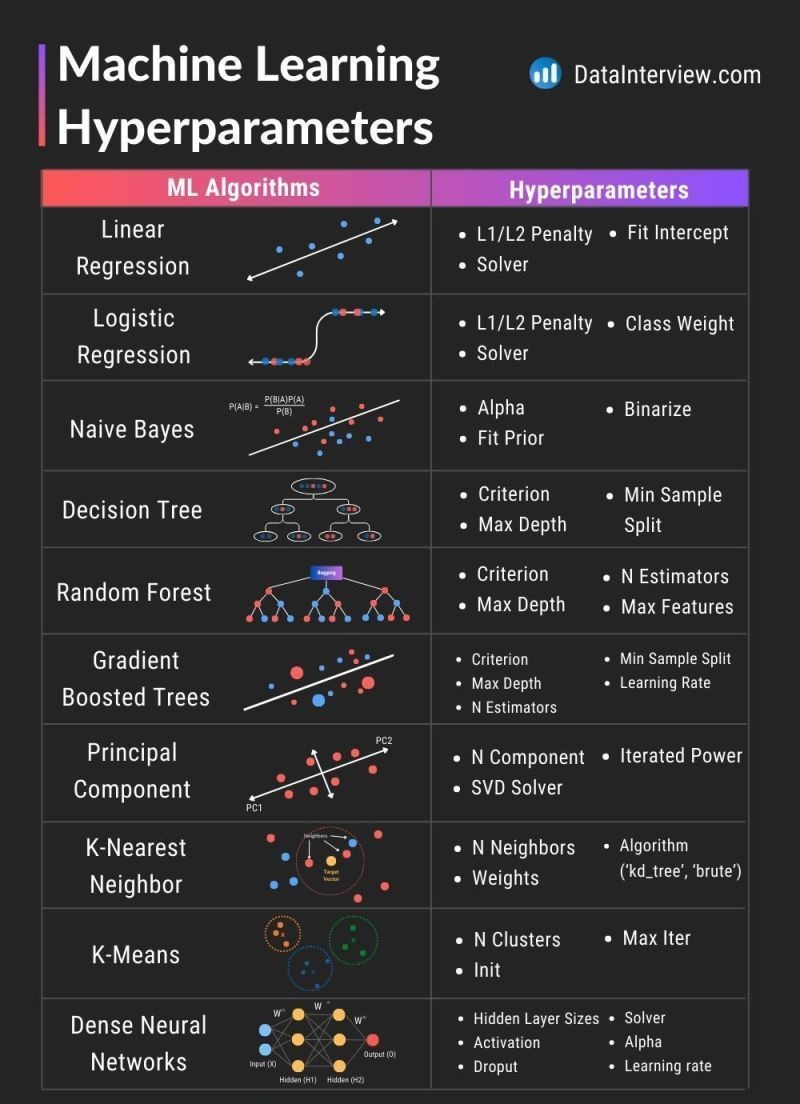

Running Linear Regression...
Linear Regression MSE: 0.009511914910418967
Running Logistic Regression...
Running Naive Bayes...
Naive Bayes Accuracy: 1.0Running Decision Tree...

Running Random Forest...
Running Gradient Boosted Trees...
Logistic Regression Accuracy: 0.83
Running Principal Component Analysis (PCA)...              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Running K-Nearest Neighbors...

Decision Tree Accuracy: 0.6638888888888889


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

Running K-Means...
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.44      0.25      0.32        28
           2       0.54      0.21      0.30        33
           3       0.42      0.82      0.55        34
           4       0.84      0.78      0.81        46
           5       0.98      0.85      0.91        47
           6       0.94      0.91      0.93        35
           7       0.89      0.71      0.79        34
           8       0.31      0.73      0.44        30
           9       0.74      0.35      0.47        40

    accuracy                           0.66       360
   m

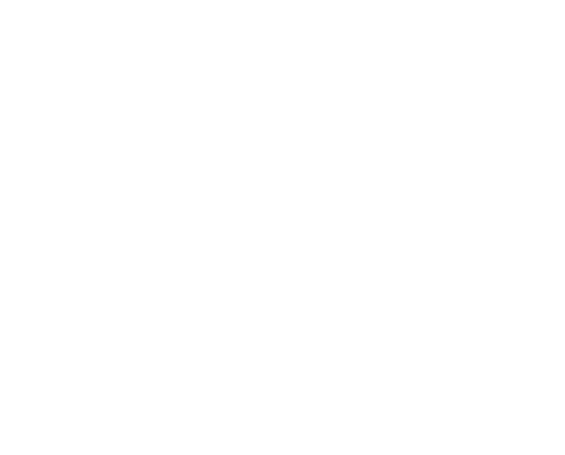

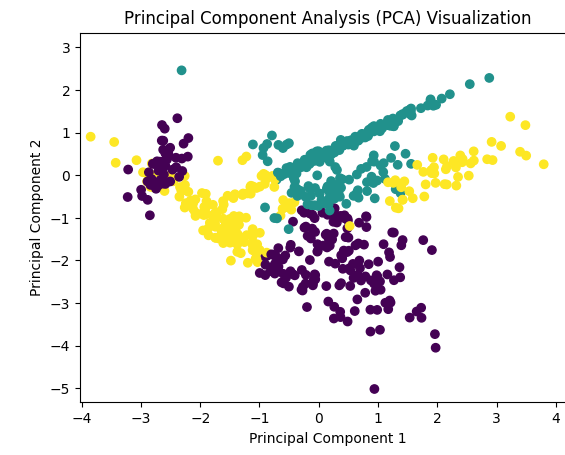

Random Forest Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        89
           1       0.91      0.86      0.88       111

    accuracy                           0.88       200
   macro avg       0.87      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200

Gradient Boosted Trees Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.95      0.86      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.90      0.90       200

Dense Neural Network Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       0.94      1.00      0.97        33
           3       1.00  

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification, make_regression, load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Function to execute each algorithm
def execute_model(name, model_func, X, y=None, is_classification=True):
    print(f"Running {name}...")
    if y is not None:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

    model = model_func()
    if name == "Principal Component Analysis (PCA)":
        X_reduced = model.fit_transform(X)
        plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
        plt.title(f"{name} Visualization")
        plt.xlabel("Principal Component 1")
        plt.ylabel("Principal Component 2")
        plt.show()
        return

    if name == "K-Means":
        model.fit(X)
        labels = model.labels_
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.title(f"{name} Clustering")
        plt.show()
        return

    model.fit(X_train, y_train if y is not None else None)
    if y is not None:
        y_pred = model.predict(X_test)
        if is_classification:
            print(f"{name} Accuracy: {accuracy_score(y_test, y_pred)}")
            print(classification_report(y_test, y_pred))
        else:
            print(f"{name} MSE: {mean_squared_error(y_test, y_pred)}")

# Dataset preparation
X_class, y_class = make_classification(n_samples=1000, n_features=10, random_state=42)
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_iris, y_iris = load_iris(return_X_y=True)
X_digits, y_digits = load_digits(return_X_y=True)
X_cluster, _ = make_classification(n_samples=500, n_features=2, n_classes=3,
                                    n_clusters_per_class=1, random_state=42,
                                    n_informative=2, n_redundant=0, n_repeated=0)
# Models
models = {
    "Linear Regression": (lambda: LinearRegression(), X_reg, y_reg, False),
    "Logistic Regression": (lambda: LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='ovr'), X_class, y_class, True),
    "Naive Bayes": (lambda: GaussianNB(), X_iris, y_iris, True),
    "Decision Tree": (lambda: DecisionTreeClassifier(max_depth=5), X_digits, y_digits, True),
    "Random Forest": (lambda: RandomForestClassifier(n_estimators=100, max_depth=10), X_class, y_class, True),
    "Gradient Boosted Trees": (lambda: GradientBoostingClassifier(n_estimators=100, learning_rate=0.1), X_class, y_class, True),
    "Principal Component Analysis (PCA)": (lambda: PCA(n_components=2), X_iris, y_iris, False),
    "K-Nearest Neighbors": (lambda: KNeighborsClassifier(n_neighbors=5), X_class, y_class, True),
    "K-Means": (lambda: KMeans(n_clusters=3, max_iter=300), X_cluster, None, False),
    "Dense Neural Network": (lambda: MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu'), X_digits, y_digits, True),
}

# Multithreading
with ThreadPoolExecutor() as executor:
    futures = [executor.submit(execute_model, name, *params) for name, params in models.items()]

# Wait for all models to finish
for future in futures:
    future.result()
